In [29]:
import pandas as pd


In [30]:
df = pd.read_csv(r'/housing-prices_prediction/Housing.csv')


In [31]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


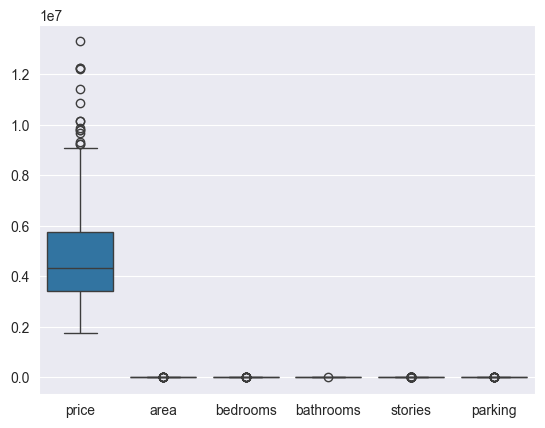

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df)
plt.show()


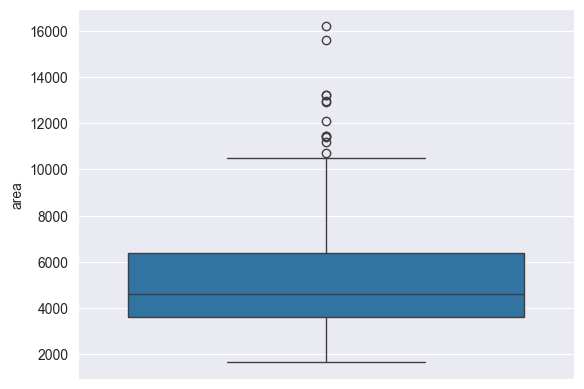

In [34]:
sns.boxplot(data=df["area"])
plt.show()

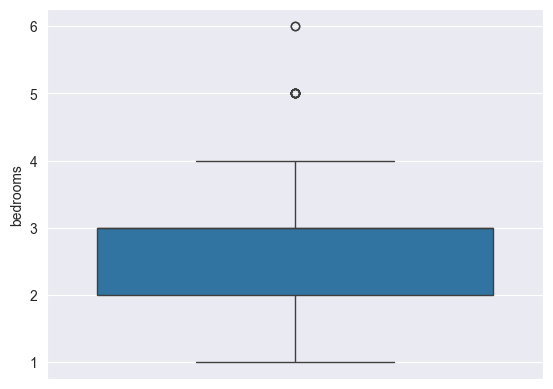

In [35]:
sns.boxplot(data=df["bedrooms"])
plt.show()

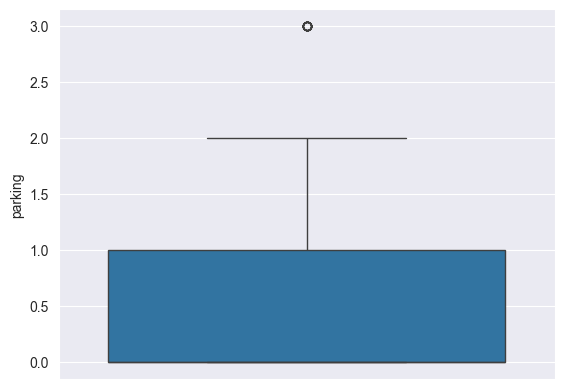

In [36]:
sns.boxplot(data=df["parking"])
plt.show()

In [37]:
df["mainroad"].unique()

array(['yes', 'no'], dtype=object)

In [38]:
df["hotwaterheating"].unique() #hotwaterheating, basement, airconditioning, prefarea, guestroom

array(['no', 'yes'], dtype=object)

In [39]:
df["furnishingstatus"].unique() # furnishingstatus


array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder


In [41]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
label_cols = ["mainroad", "guestroom", "basement", "airconditioning", "prefarea", "hotwaterheating"]
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [42]:
df['price_per_sqft'] = df['price'] / df['area']

In [43]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_sqft
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False,1792.452830
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False,1367.187500
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False,1229.919679
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False,1628.666667
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False,1537.735849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True,606.666667
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False,736.312500
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True,483.425414
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False,601.374570


In [44]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_sqft
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587,0.392921
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278,-0.465517
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252,0.229549
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107,0.283839
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972,0.303850
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123,-0.031501
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023,0.080247
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935,0.180458
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194,0.129581
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086,0.161690


In [45]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
#
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
#
# outliers = ((df < lower_bound) | (df > upper_bound)).sum()
# outliers

In [46]:
from scipy.stats.mstats import winsorize
df['price'] = winsorize(df['price'], limits=[0.05, 0.05])

In [47]:
from sklearn.preprocessing import StandardScaler
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price_per_sqft']
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])


In [48]:
from scipy import stats


In [49]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_sqft
price,1.000000,0.538937,0.369350,0.504247,0.440189,0.311716,0.277771,0.191771,0.100666,0.468442,0.369016,0.329171,0.073263,-0.289013,0.382373
area,0.538937,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278,-0.465517
bedrooms,0.369350,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252,0.229549
bathrooms,0.504247,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107,0.283839
stories,0.440189,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972,0.303850
mainroad,0.311716,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123,-0.031501
guestroom,0.277771,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023,0.080247
basement,0.191771,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935,0.180458
hotwaterheating,0.100666,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194,0.129581
airconditioning,0.468442,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086,0.161690


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['price'])
y = df['price']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
import tensorflow as tf

X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_val_tensor = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.float32)



area                               0.527570
price_per_sqft                     0.443628
bathrooms                          0.011674
parking                            0.003509
prefarea                           0.003297
stories                            0.002035
bedrooms                           0.001456
furnishingstatus_semi-furnished    0.001362
furnishingstatus_unfurnished       0.001252
hotwaterheating                    0.001241
basement                           0.001140
airconditioning                    0.000945
guestroom                          0.000579
mainroad                           0.000310
dtype: float64


In [51]:
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


C:\Users\lilit\Kaggle-projects\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, callbacks=[early_stopping], verbose=1)



Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 24276860141568.0000 - mae: 4659997.5000 - val_loss: 27349636612096.0000 - val_mae: 4890520.0000
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25342781685760.0000 - mae: 4763620.5000 - val_loss: 27349179432960.0000 - val_mae: 4890476.5000
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23173789646848.0000 - mae: 4566319.5000 - val_loss: 27347153584128.0000 - val_mae: 4890286.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23805504258048.0000 - mae: 4620703.0000 - val_loss: 27340742590464.0000 - val_mae: 4889690.0000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25948214788096.0000 - mae: 4815608.0000 - val_loss: 27324340764672.0000 - val_mae: 4888178.5000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25029332959232.0000 - mae: 4734809.5000 - val_loss: 27289504972800.0000 - val_mae: 4884991.5000
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23562817634

In [53]:
import numpy as np
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE: 941704.97
R² Score: 0.7416


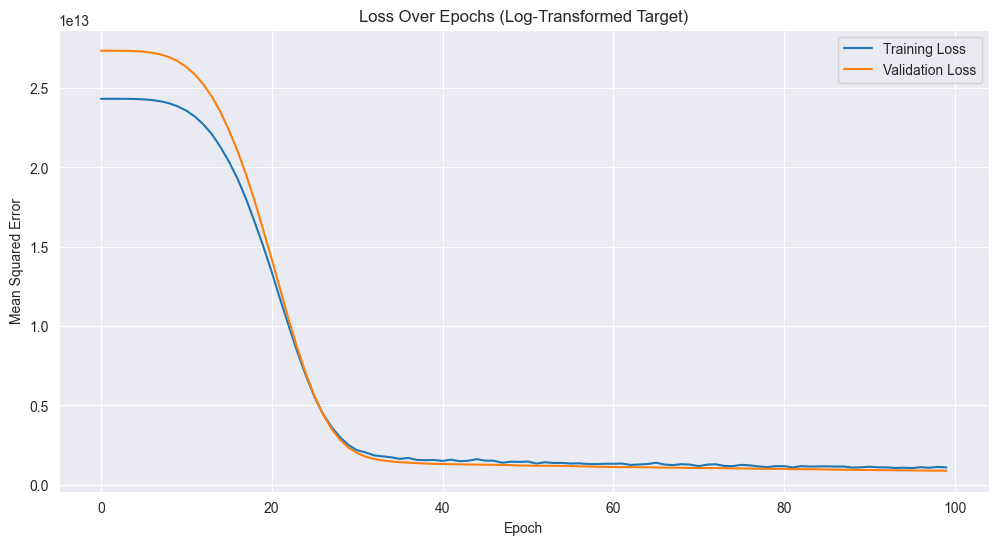

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs (Log-Transformed Target)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\lilit\Kaggle-projects\housing-prices_prediction\training_loss_plot.png')
plt.show()

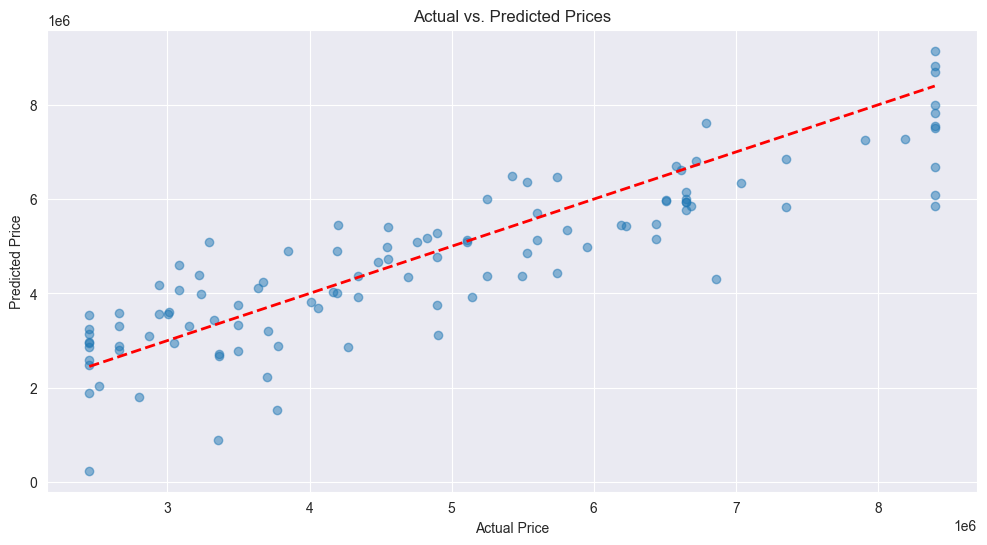

In [55]:
# Plot Actual vs. Predicted Prices
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.savefig(r'C:\Users\lilit\Kaggle-projects\housing-prices_prediction\actual_vs_predicted_plot.png')
plt.show()